In [ ]:
###########################################
##  Carry out alignment between fasta #####
###########################################
cmd = 'fasta36 %s %s -T%d -m10  -f0 -g0' % (fname,
                                               fname,
                                              num_T)
num_T = 8
template = "fasta36 %s %s -m10 -d0 -T4 -n > out"
fastaLib1 = 
cmd = tempalte % (fastaLib1,
                  fastaLib2,
                  num_T,
                    )

"fasta36 Escherichia_coli_str_k_12_substr_mds42.GCA_000350185.1.23.cdna.all.names.fa Buchnera_aphidicola_bcc.ASM9096v1.cdna.all.fa  -m10 -d0 -T4 -n > out &"
"ggsearch36 Escherichia_coli_str_k_12_substr_mds42.GCA_000350185.1.23.cdna.all.names.fa Buchnera_aphidicola_bcc.ASM9096v1.cdna.all.fa -m10 -T7 -n > ggsearch_aln.m10"
"fasta36 Escherichia_coli_str_k_12_substr_mds42.GCA_000350185.1.23.cdna.all.names.fa Buchnera_aphidicola_bcc.ASM9096v1.cdna.all.fa -m10 -T7 -n > fasta36_aln.m10"
"fasta36 Buchnera_aphidicola_bcc.ASM9096v1.cdna.all.fa Escherichia_coli_str_k_12_substr_mds42.GCA_000350185.1.23.cdna.all.names.fa -m10 -T7 -n > fasta36_aln_BAphid.m10"

fout = "test.m10"

In [ ]:
import Bio.SeqIO
it = Bio.SeqIO.parse( fname,'fasta' )
hash2did = {}
# i = 0
for i,ent in enumerate(it):
    h = hash(ent.name) 
    hash2did[ h ] = (i,ent.name)

class fastaLib(object):
    def __init__(self,tmpdir = 'DATA'):
        self._make_name_dict()
    def _make_name_dict(self,):
        pass
        
#############################################
### compile name_dict for each fasta file ###
#############################################


In [1]:
from tempfile import TemporaryFile , mkdtemp

def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

def split_file(fname, number = None, linecount = None, delimiter = '\n',header = '\n',footer = '\n'):
    if linecount and number:
        raise Exception('You can only specify one of linecount or number')
    f_handles = []
    tempdir = mkdtemp(prefix = '/tmp/feng')
    
#     lcount = file_len(fname)
    with open(fname,'r') as f:
#         lines = f.readlines()
        lines = f.read().lstrip(header).rstrip(footer).split(delimiter)
        lcount = len(lines)
    print tempdir
    print lcount 
#     return
    
    if number:
#         with open(fname) as f:
#             lines = f.readlines()
        lcount = len(lines)
        nlcount = lcount // number + 1
        idxs = range(0, lcount, nlcount)
        for i,idx in enumerate(idxs):
            print i
#             if i >= 11:
#                 break

#             f = TemporaryFile()
            temp_fname = tempdir + '/%d'%i
            f = open(temp_fname, 'w+')
            f.write( header)
            f.write( delimiter.join(lines[idx: idx+nlcount]))
            f.write( footer)
#             f.close()
#             f = open(temp_fname,'r')
#             f.seek(0)
            f_handles.append(temp_fname)
    if linecount:
        idx = 0
        i   = 0
        nlcount = linecount
        while 1:
            temp_fname = tempdir + '/%d'%i
            f = open(temp_fname, 'w' )
            f.write( header)
            f.write( delimiter.join(lines[idx:idx + nlcount]) )
            f.write( footer)
            f.seek(0)
            f_handles.append(temp_fname)
            if idx + nlcount+1 >= lcount: 
                break
            else:
                idx += nlcount
                i   += 1
    return f_handles

In [ ]:
###########################################
## Parse the output and visulise E-value ##
###########################################

In [3]:
########################################################
########################################################
### Hack to parse FASTA-m10 into data,frame ###
########################################################
from domutil.util import *
class fastaLib(object):
    def __init__(self,fname,tmpdir = 'data'):
        self._make_name_dict(fname)
    def _make_name_dict(self,fname):
        self.name_dict = hashfasta( fname )
#         pk.dump(name_dict)

def func(oname):
#     it = Bio.SearchIO.parse( oname,'fasta-m10' )
#     d = {}
    it = Bio.SearchIO.parse( oname,'fasta-m10' )
    l = []
    i = 0
#     print sum(1 for _ in it)
    for ent in it:
        hits = ent.__dict__['_items']
#         qid = hash(ent.id)
#         l += [(ent.id,ent)]
#         continue
        query_id = ent.id
        for hit in hits.values():
            v = hit[0]
#             v.__dict__.update({"query_id":ent.id,"hit_id":hit.id})
#             dct = {"query_id":ent,"hit_id":hit}
#             v.__dict__.pop('_items')
#             dct.update(v.__dict__)
# #             dct.update({"query_id":ent.id,"hit_id":hit.id})
# #             dct.pop('_items')
#             l += [dct]
            v.__dict__.update({"query_id":query_id,
                              "hit_id":hit.id})
            v.__dict__.pop('_items')
            l += [v.__dict__]
#             l += [((ent.id,hit_id),v)]
#             jid = hash(hit.id)
#             l += [((qid,jid),v)]
#         i += 1
#         print i
#     print len(l)
    return l


def out2dmat( fname,  hash2did = None, para = 10, func = func,
            qfile  = None,libfile = None,):
    def findheader(fname):
        with open(fname,'r') as f:            
            header = ''
            line = f.readline()
            try:
                while not line.startswith('Query'):
                    header += line
                    line = f.readline()            
                header += line
            except Exception as e:
                raise Exception("Unable to grab the header from file :'%s'"%fname + str(e) )
            buf = f.read()
            tmpf = 'parse.tmp'
            with open( tmpf,'w') as of:
                 of.write(buf)
        return header, tmpf
    if isinstance( fname,list):
        f_handles = fname
        tmpf = ''
    else:
#     if 1:
        header,tmpf = findheader(fname)
#         f_handles = split_file( fname, number = para,
#                        delimiter = '>>><<<',
#                        header = header,
#                        footer = '\n>>>///\n',
#                               start = 10,)
        f_handles = split_file( tmpf, number = para,
#                        delimiter = 'Query',
                        delimiter = '>>><<<',
#                        header = header,
                               header  = header,
                       footer = '\n>>>///\n',
                              start = 0,)
        print header

    xs = []
    ys = []
    d  = {}
    if para > 1:
        pool = mp.Pool( para )
        res = pool.map( func, f_handles)
        lst = sum( res,[] )        
        pool.close()
#         pool.join()
    else:
        lst = []
        i = 0
        print 'handles:',f_handles
        for oname in f_handles:        
            print 'now parsing:',oname
            print i
            i += 1
            lst += func(oname)
#             d.update(dict(lst))
#             it = Bio.SearchIO.parse( oname,'fasta-m10' )
#             for ent in it:
#             #     print ent
#                 hits = ent.__dict__['_items']
#                 qid = hash(ent.id)
#                 for hit in hits.values():
#                     v = hit[0].bitscore
#                     jid = hash(hit.id)
#                     d[ ( qid, jid) ] = v
    return lst
    d.update(dict(lst))
    return d
        
    l = len(hash2did)
    om = scipy.sparse.dok_matrix( (l,l) )
    order_d = { (hash2did[k[0]][0],
                hash2did[k[1]][0]):
               v for k,v in d.iteritems()
              }
    om.update(order_d)
    
    if tmpf:
        os.remove(tmpf)
    for tmpf in f_handles:
        os.remove(tmpf)
    return om

################### Debug playground ##########################
oname = "fasta36_aln_BAphid.m10"
it = Bio.SearchIO.parse( oname,'fasta-m10' )
l = []
for ent in it:
    hits = ent.__dict__['_items']
    qid = hash(ent.id)
    for hit in hits.values():
        jid = hash(hit.id)
        v = hit[0]
        l += [((qid,jid),v)]
        raise(Exception("hi"))

/home/shouldsee/.local/lib/python2.7/site-packages/Bio/SearchIO/__init__.py:211: BiopythonExperimentalWarning: Bio.SearchIO is an experimental submodule which may undergo significant changes prior to its future official release.
  BiopythonExperimentalWarning)


In [12]:
from tempfile import TemporaryFile , mkdtemp

fout = "ggsearch.m10"
fout = "ggsearch_aln.m10"
fout = "fasta36_aln.m10"
fout = "fasta36_aln_BAphid.m10"

fas1 = "Buchnera_aphidicola_bcc.ASM9096v1.cdna.all.fa"
fas2 = "Escherichia_coli_str_k_12_substr_mds42.GCA_000350185.1.23.cdna.all.names.fa"


# hash2head = hashfasta()
# fasta
# f_handles = split_file( fout, 100, delimiter = '>>><<<')
# fout = f_handles[1]
dout = out2dmat(fout,para = 6)

# fas1 = fastaLib(fas1)
# fas2 = fastaLib(fas2)
# import os
print "Data parsed"
# dout

# len(dout)
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
# dcts = [x.__dict__ for x in dout]
dcts = dout
df = pd.DataFrame(dcts)
df['query_id'] = df['query_id'].astype(object)
df['hit_id'] = df['hit_id'].astype(object)
# df.boxplot
# dout[0].__dict__

print "Data Frame is Ready"
df.head()


/tmp/fengaqq3K4
366
# fasta36 Buchnera_aphidicola_bcc.ASM9096v1.cdna.all.fa Escherichia_coli_str_k_12_substr_mds42.GCA_000350185.1.23.cdna.all.names.fa -m10 -T7 -n
FASTA searches a protein or DNA sequence data bank
 version 36.3.8d Apr, 2016(preload9)
Please cite:
 W.R. Pearson & D.J. Lipman PNAS (1988) 85:2444-2448

Query: Buchnera_aphidicola_bcc.ASM9096v1.cdna.all.fa

Data parsed
Data Frame is Ready


,bitscore,evalue,hit_id,ident_pct,init1_score,initn_score,opt_score,pos_pct,query_id,z_score
0,445.5,5.200000e-125,gidA,54.5,663,1004,1662,54.5,ABJ90487,2335.3
1,45.6,1.300000e-04,ygeF,58.0,76,146,155,58.0,ABJ90487,185.3
2,42.5,1.100000e-03,rfaK,58.6,85,216,153,58.6,ABJ90487,161.7
3,40.3,5.000000e-03,rfaS,55.2,93,129,169,55.2,ABJ90487,150.8
4,39.5,8.400000e-03,yddJ,57.5,85,135,133,57.5,ABJ90487,154.8


In [11]:
################## Trasher ################
for f in f_handles:
    os.remove(f)
for f in f_handles1:
    os.remove(f)
print "Done"    
print "Done"

NameError: name 'f_handles' is not defined

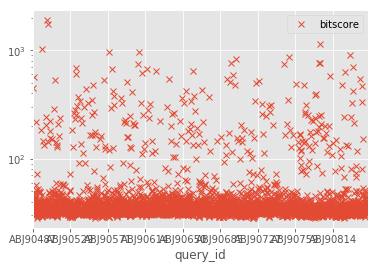

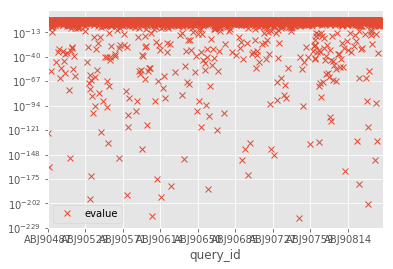

In [15]:
# df.plot.scatter(x='query_id', y='bitscore');
%matplotlib inline
plt.figure()
df.plot(x='query_id', y='bitscore',style='x'
       ,logy = 'true')
df.plot(x='query_id', y='evalue',style='x'
       ,logy = 'true')
# ?df.plot
# pl.xticks(x,xticks)

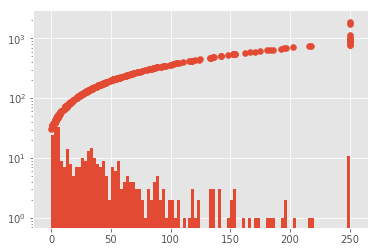

In [16]:
###########################################
## And visulise 
###########################################
# plt.scatter(x = df2['evalue'].transform(lambda x: -np.log10(x) if x else 250 ),
#            y = df2['bitscore'])

# idx = df.groupby(['query_id'])['evalue'].transform(min) == df['evalue']
idx = df.groupby(['query_id'])['bitscore'].transform(max) == df['bitscore']
df2 = df[idx]
# df2.__len__()
# help(df2['evalue'].hist)
# ()
df2['evalue'].transform(lambda x: -np.log10(x) if x else 250 ).hist(bins = 100)
# df2['bitscore'].hist(bins = 100)
plt.gca().set_yscale('log')
# plt.gca().set_xscale('log')

# df2  = df.groupby(['query_id'],as_index=False).agg({'bitscore':'max','evalue':'min'})
# df2
plt.scatter(x = df2['evalue'].transform(lambda x: -np.log10(x) if x else 250 ),
           y = df2['bitscore'])

In [ ]:
###########################################
## And visulise E-value ######
###########################################
import numpy as np
import pylab as p
data=np.array(np.random.rand(1000))
y,binEdges=np.histogram(data,bins=100)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
p.plot(bincenters,y,'-')
p.show()

ax.hist()

In [3]:
fout = "test.m10"
# fasdfsadf
# print "hi"

ERROR:root:Cell magic `%%R` not found.
